In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns



In [13]:
diamonds = pd.read_csv('./diamonds.csv')
crickets = pd.read_csv('./Cricket_chirps.csv')

In [45]:
X = crickets['X']
y = crickets['Y']

In [38]:
X_with_constant = sm.add_constant(X)
simple_model = sm.OLS(endog = y, exog = X_with_constant).fit()
predictions = simple_model.predict(X_with_constant)
residuals = y - predictions

## Assumption 1: Linearity

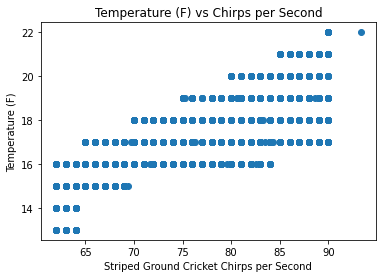

In [39]:
plt.scatter(X,y)
plt.ylabel('Temperature (F)')
plt.xlabel('Striped Ground Cricket Chirps per Second')
plt.title('Temperature (F) vs Chirps per Second')
plt.savefig('./graphs/chirpsvstemp', bbox_inches='tight');

## Assumption 2: Normality

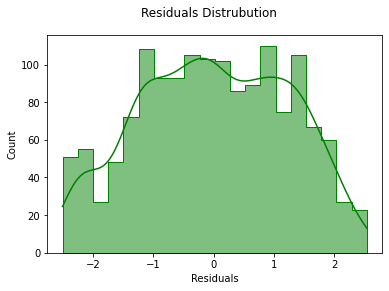

In [40]:
fig, ax = plt.subplots()
sns.histplot(residuals, bins=20, element="step", kde=True, color="green", ax=ax)
ax.set_xlabel("Residuals")
fig.suptitle("Residuals Distrubution")
plt.savefig('./graphs/normality_example', bbox_inches='tight');

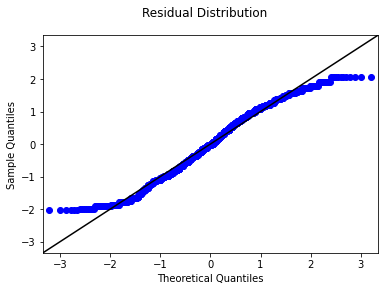

In [41]:
fig, ax = plt.subplots()
sm.graphics.qqplot(simple_model.resid, dist=stats.norm, line='45', fit=True, ax=ax)
line = ax.lines[1]
line.set_color("black")
fig.suptitle("Residual Distribution")
plt.savefig('./graphs/qq_plot_bad', bbox_inches='tight');

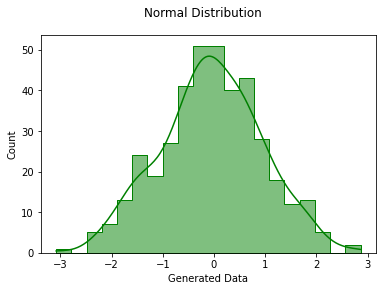

In [42]:
# CREATING NORMAL DATA 
generated_data = stats.norm.rvs(size=400, random_state=7)
fig, ax = plt.subplots()
sns.histplot(generated_data, bins=20, element="step", kde=True, color="green", ax=ax)
ax.set_xlabel("Generated Data")
fig.suptitle("Normal Distribution")
plt.savefig('./graphs/normality_good', bbox_inches='tight');

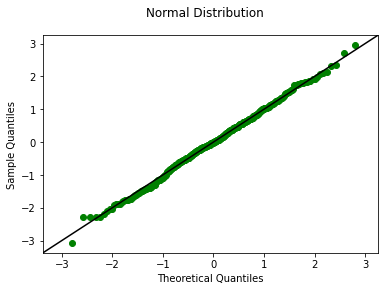

In [43]:
# Use qqplot function from StatsModels
fig, ax = plt.subplots()
sm.graphics.qqplot(generated_data, dist=stats.norm, line='45', fit=True, ax=ax)

# Customize plot appearance
scatter = ax.lines[0]
line = ax.lines[1]
scatter.set_markeredgecolor("green")
scatter.set_markerfacecolor("green")
line.set_color("black")
fig.suptitle("Normal Distribution")
plt.savefig('./graphs/qqplot_good', bbox_inches='tight');

## Assumption 3 : Homoscedasticity 

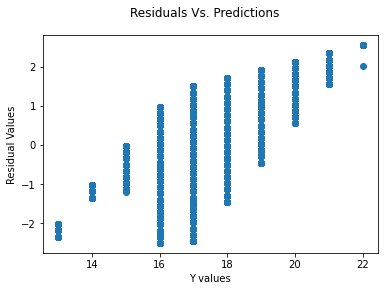

In [44]:
fig, ax = plt.subplots()
ax.scatter(y, residuals)
ax.set_xlabel('Y values')
ax.set_ylabel('Residual Values')
plt.suptitle('Residuals Vs. Predictions')
plt.savefig('./graphs/homoscedasticity', bbox_inches='tight');

## Assumption 4: Independence

In [20]:
dw = sm.stats.stattools.durbin_watson
dw(residuals)

1.962232159579161